In [1]:
import brainlit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from brainlit.algorithms.regression import *

Using TensorFlow backend.


# Tutorial for running the classifiers on extracted features - 5x5 neighborhoods

Loading extracted neighborhood features from csv file(This file will be changed to include the whole data).<br />
The neighborhood here is a 5x5x5 with 125 features. from 4 different files

In [65]:
output_feats = "Dataset_nonlinear_features/5x5x5/neighborhood1.csv" 
df_iter = pd.read_csv(output_feats, header=None)
output_feats = "Dataset_nonlinear_features/5x5x5/neighborhood2.csv" 
df_iter1 = pd.read_csv(output_feats, header=None)
df_iter = df_iter.append(df_iter1)
output_feats = "Dataset_nonlinear_features/5x5x5/neighborhood3.csv"
df_iter1 = pd.read_csv(output_feats, header=None)
df_iter = df_iter.append(df_iter1)
output_feats = "Dataset_nonlinear_features/5x5x5/neighborhood4.csv" 
df_iter1 = pd.read_csv(output_feats, header=None)
df_iter = df_iter.append(df_iter1)
n_features = df_iter.shape[1] - 1
X_all = df_iter.iloc[:, :n_features]
y_all = df_iter.iloc[:, n_features:]
np.array(X_all).shape, np.array(y_all).shape

((13480, 125), (13480, 1))

Normalizing and splitting the dataset

In [66]:
X_all = StandardScaler().fit_transform(X_all)
print(np.array(X_all).shape)
X_sel, X_test, y_sel, y_test = train_test_split(
    X_all, y_all, test_size=40, random_state=42)

(13480, 125)


Setting up classifiers to train:<br />
1) Multilayer Perceptron with 4 hiddenlayer, all layers having sigmoid activation.<br />
2) Simple Logistic Regression classifier<br />
3) Two layer Neural Network with output Logistic Regression layer with sigmoid activation and input layer is a fullyconnected layer with ReLU activation.<br />

In [68]:
classifiers = [
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", alpha=1, max_iter=1000),
    LogisticRegression(max_iter=1000),
    MLP_LR_NN(X_sel, y_sel, n_features),
]

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running the classifiers on the train and test data to get accuracy of each classifier.<br />
The accuracy, train time, test time, classifier name and number of iteration is stored in a csv file : "test.csv"

In [69]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
run_classifiers(
        X_sel, y_sel, X_test, y_test, classifiers, names, filename="Dataset_nonlinear_features/tests/test_5x5.csv")

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  2.12it/s]

40/40 [==============================] - 0s 474us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

 10%|█         | 1/10 [00:01<00:10,  1.17s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

40/40 [==============================] - 0s 1ms/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

 20%|██        | 2/10 [00:02<00:09,  1.16s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  4.42it/s]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

 30%|███       | 3/10 [00:03<00:07,  1.08s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  4.30it/s]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

 40%|████      | 4/10 [00:04<00:06,  1.15s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.61it/s]

40/40 [==============================] - 0s 524us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

 50%|█████     | 5/10 [00:05<00:05,  1.12s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

40/40 [==============================] - 0s 499us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

 60%|██████    | 6/10 [00:06<00:04,  1.02s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

40/40 [==============================] - 0s 1ms/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

 70%|███████   | 7/10 [00:07<00:02,  1.02it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  8.72it/s]

40/40 [==============================] - 0s 549us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

 80%|████████  | 8/10 [00:08<00:01,  1.07it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  6.08it/s]

40/40 [==============================] - 0s 499us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

 90%|█████████ | 9/10 [00:08<00:00,  1.11it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

40/40 [==============================] - 0s 598us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 33%|███▎      | 1/3 [00:00<

40/40 [==============================] - 0s 698us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

 10%|█         | 1/10 [00:02<00:18,  2.06s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  2.01it/s]

40/40 [==============================] - 0s 616us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

 20%|██        | 2/10 [00:03<00:15,  2.00s/it]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 33%|███▎      | 1/3

40/40 [==============================] - 0s 1ms/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

 30%|███       | 3/10 [00:05<00:13,  1.93s/it]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 33%|███▎      | 1/3

40/40 [==============================] - 0s 524us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

 40%|████      | 4/10 [00:07<00:11,  1.93s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  2.10it/s]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

 50%|█████     | 5/10 [00:09<00:09,  1.96s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  2.23it/s]

40/40 [==============================] - 0s 573us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

 60%|██████    | 6/10 [00:11<00:07,  1.94s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  2.38it/s]

40/40 [==============================] - 0s 524us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

 70%|███████   | 7/10 [00:13<00:05,  1.84s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:01,  1.60it/s]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

 80%|████████  | 8/10 [00:14<00:03,  1.79s/it]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 33%|███▎      | 1/3

40/40 [==============================] - 0s 673us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

 90%|█████████ | 9/10 [00:16<00:01,  1.80s/it]

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


 33%|███▎      | 1/3

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:02,  1.43s/it]

40/40 [==============================] - 0s 781us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:08<00:00,  2.75s/it]

 10%|█         | 1/10 [00:08<01:14,  8.25s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.64s/it]

40/40 [==============================] - 0s 474us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.55s/it]

 20%|██        | 2/10 [00:15<01:04,  8.07s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.72s/it]C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

40/40 [==============================] - 0s 1ms/step




100%|██████████| 3/3 [00:07<00:00,  2.66s/it]

 30%|███       | 3/10 [00:23<00:56,  8.04s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:02<00:04,  2.09s/it]

40/40 [==============================] - 0s 524us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

 40%|████      | 4/10 [00:32<00:48,  8.09s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.53s/it]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

 50%|█████     | 5/10 [00:39<00:40,  8.01s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.95s/it]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:08<00:00,  2.78s/it]

 60%|██████    | 6/10 [00:48<00:32,  8.11s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.82s/it]

40/40 [==============================] - 0s 781us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.52s/it]

 70%|███████   | 7/10 [00:55<00:23,  7.95s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.95s/it]

40/40 [==============================] - 0s 781us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.56s/it]

 80%|████████  | 8/10 [01:03<00:15,  7.86s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.60s/it]

40/40 [==============================] - 0s 548us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.49s/it]

 90%|█████████ | 9/10 [01:10<00:07,  7.75s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:01<00:03,  1.82s/it]

40/40 [==============================] - 0s 781us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:07<00:00,  2.56s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:04<00:09,  4.69s/it]

 67%|██████▋   | 2/3 [00:05<00:03,  3.54s/it]

40/40 [==============================] - 0s 390us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:06<00:00, 22.19s/it]

 10%|█         | 1/10 [01:06<09:59, 66.56s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:04<00:08,  4.21s/it]

 67%|██████▋   | 2/3 [00:04<00:03,  3.15s/it]

40/40 [==============================] - 0s 390us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:04<00:00, 21.52s/it]

 20%|██        | 2/10 [02:11<08:47, 65.96s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:04<00:09,  4.83s/it]

 67%|██████▋   | 2/3 [00:05<00:03,  3.63s/it]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:06<00:00, 22.33s/it]

 30%|███       | 3/10 [03:18<07:43, 66.27s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:05<00:11,  5.53s/it]

 67%|██████▋   | 2/3 [00:06<00:04,  4.06s/it]

40/40 [==============================] - 0s 944us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:06<00:00, 22.03s/it]

 40%|████      | 4/10 [04:24<06:37, 66.22s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:04<00:08,  4.33s/it]

 67%|██████▋   | 2/3 [00:05<00:03,  3.29s/it]

40/40 [==============================] - 0s 390us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:02<00:00, 20.83s/it]

 50%|█████     | 5/10 [05:26<05:25, 65.11s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:03<00:07,  3.64s/it]

 67%|██████▋   | 2/3 [00:04<00:02,  2.77s/it]

40/40 [==============================] - 0s 781us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:03<00:00, 21.07s/it]

 60%|██████    | 6/10 [06:29<04:18, 64.53s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:04<00:08,  4.23s/it]

 67%|██████▋   | 2/3 [00:04<00:03,  3.16s/it]

40/40 [==============================] - 0s 390us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:02<00:00, 20.80s/it]

 70%|███████   | 7/10 [07:32<03:11, 63.89s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:03<00:07,  3.60s/it]

 67%|██████▋   | 2/3 [00:04<00:02,  2.71s/it]

40/40 [==============================] - 0s 391us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:59<00:00, 19.88s/it]

 80%|████████  | 8/10 [08:31<02:05, 62.62s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:03<00:06,  3.37s/it]

 67%|██████▋   | 2/3 [00:03<00:02,  2.54s/it]

40/40 [==============================] - 0s 399us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [00:59<00:00, 19.81s/it]

 90%|█████████ | 9/10 [09:31<01:01, 61.67s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:02<00:05,  2.71s/it]

 67%|██████▋   | 2/3 [00:03<00:02,  2.08s/it]

40/40 [==============================] - 0s 553us/step


C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100%|██████████| 3/3 [01:00<00:00, 20.16s/it]

100%|██████████| 4/4 [12:20<00:00, 185.03s/it]


'test_5x5.csv'

The data from "test.csv" can be plotted using the plot_data function as follows

In [70]:
names = {"MLP-LR": "black", "LR": "blue", "MLP-relu-LR": "red"}
fig,ax = plot_data("Dataset_nonlinear_features/tests/test_5x5.csv", names, "Accuracy", "Accuracy", "MLP-LR vs LR classification - neighborhood")

C:\Users\sanik\Anaconda3\envs\brainlight2\lib\site-packages\brainlit\algorithms\regression\log_regression.py:209: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="bottom right", title="Algorithm")


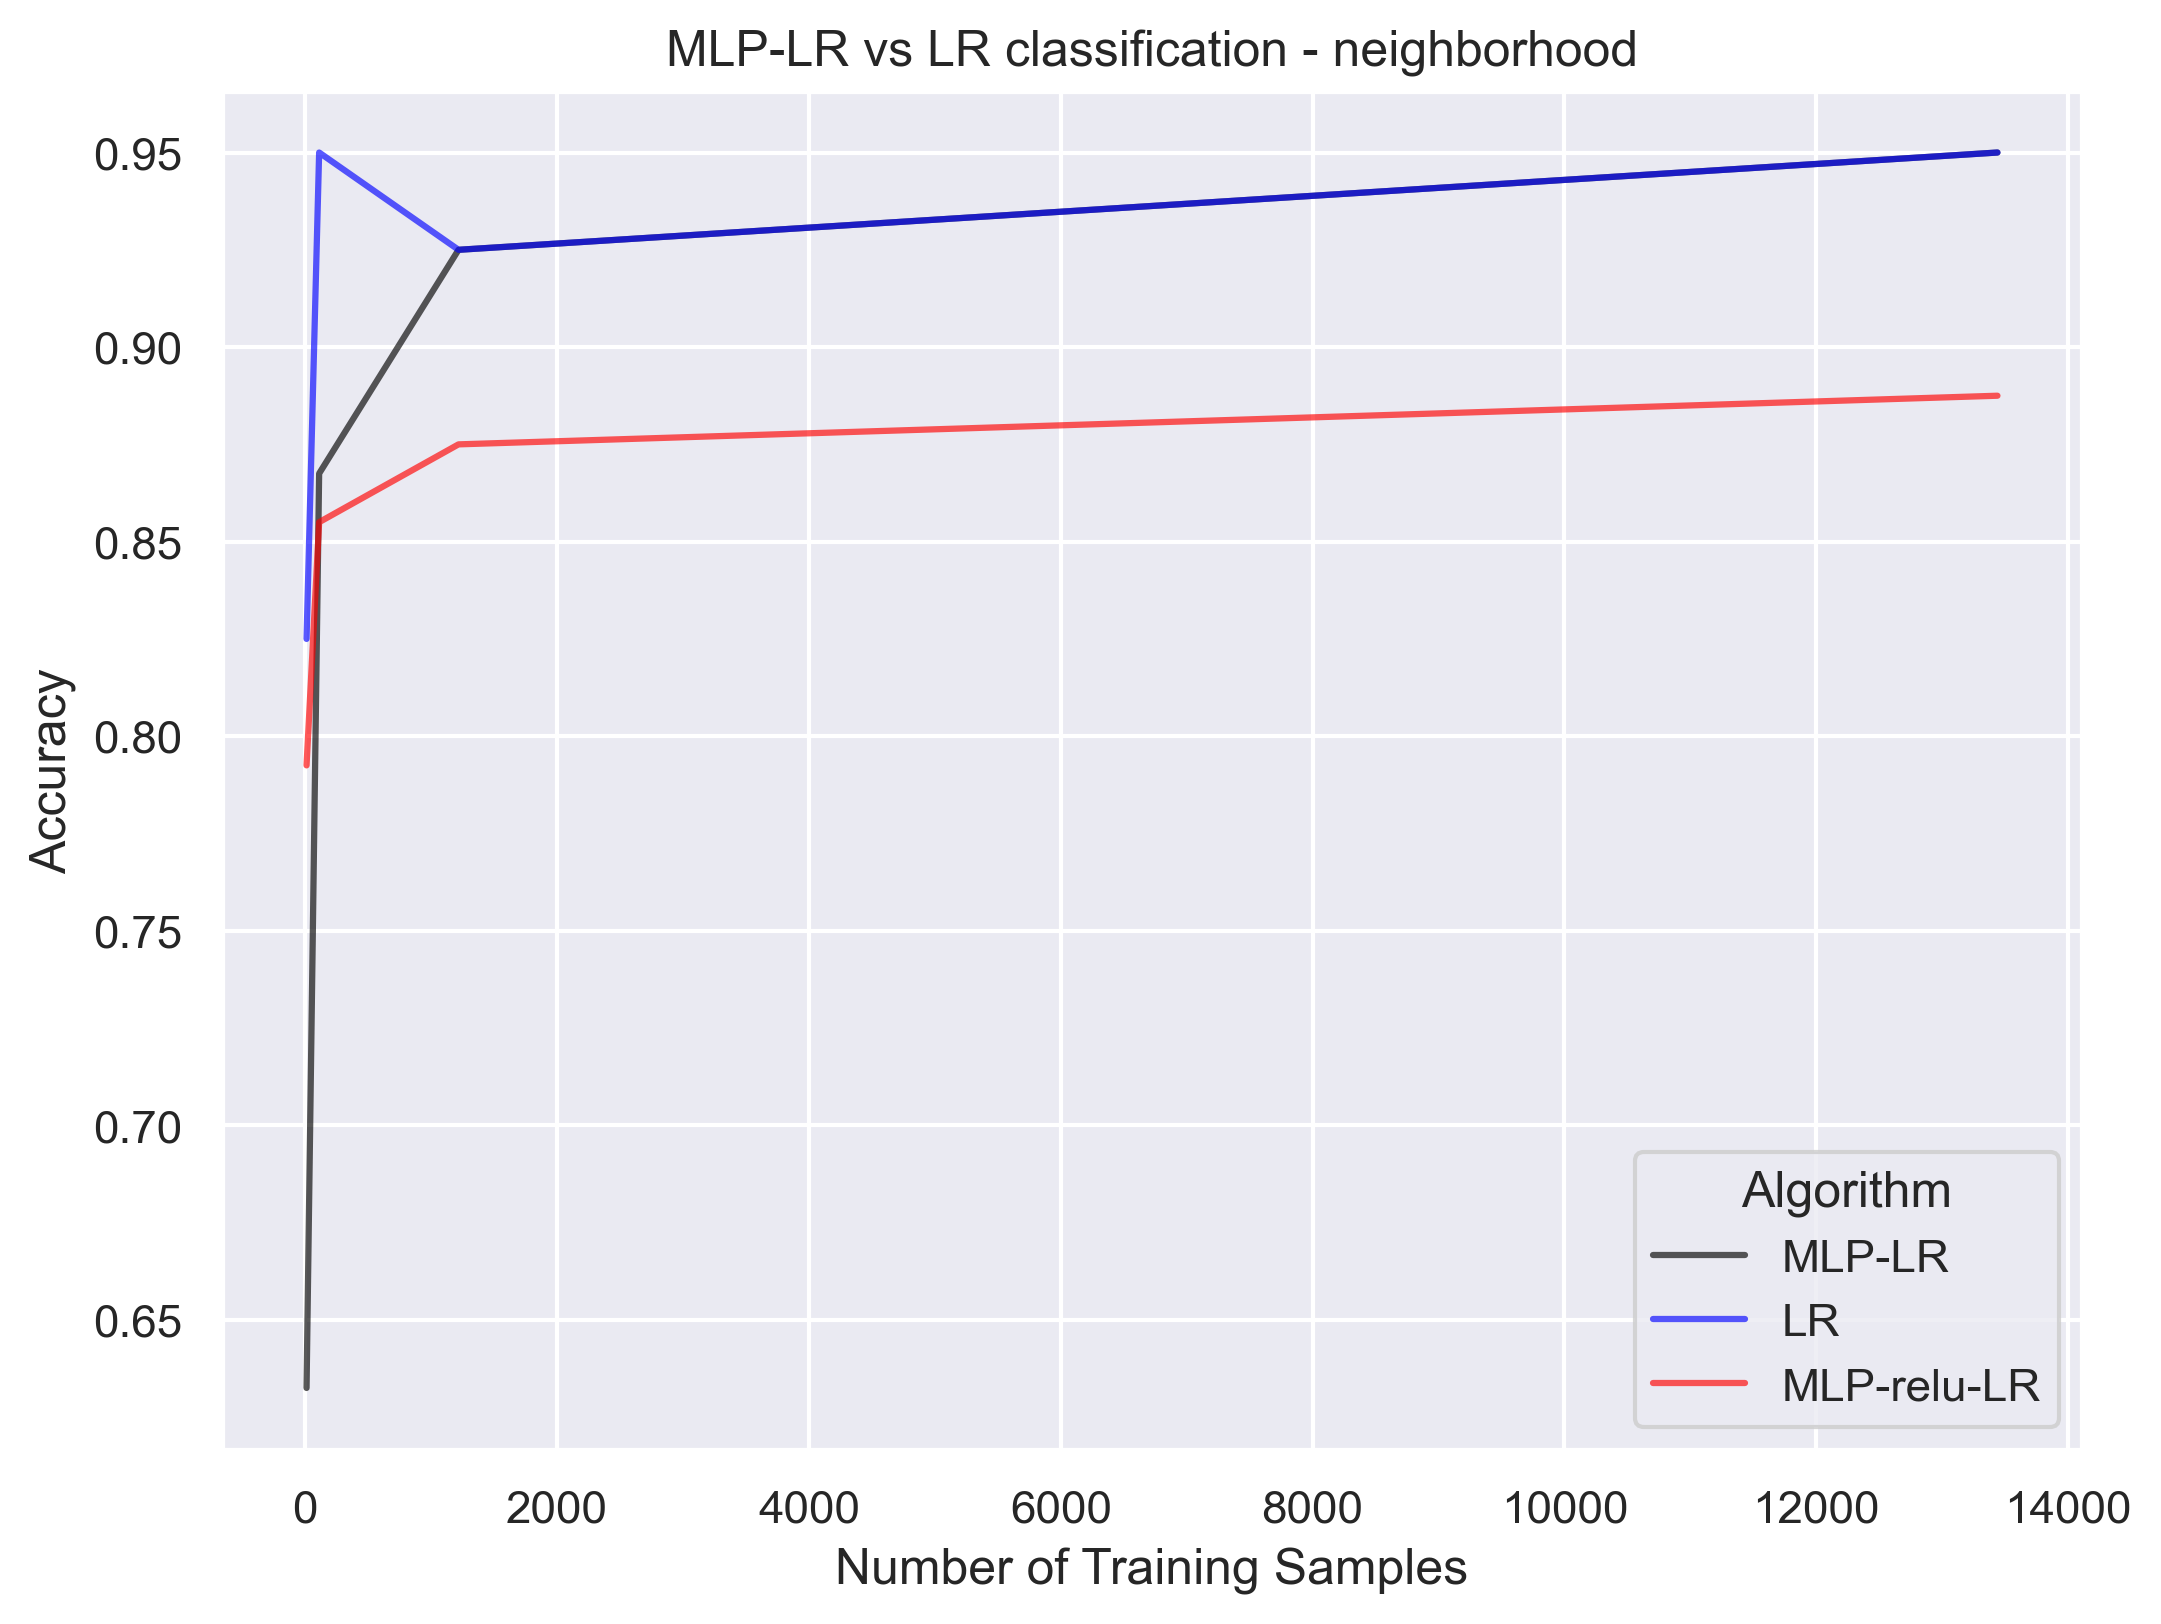

In [71]:
fig